In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

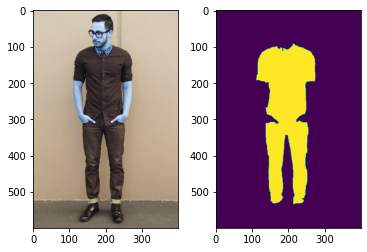

In [22]:
from PIL import Image
import numpy as np

### 4-8服装区域
id=1345
plt.subplot(121)
img=cv2.imread(f'./dataset/ICCV15_fashion_dataset(ATR)/humanparsing/JPEGImages/dataset10k_{id}.jpg')
plt.imshow(img)
plt.subplot(122)
mask = cv2.imread(f'./dataset/ICCV15_fashion_dataset(ATR)/humanparsing/SegmentationClassAug/dataset10k_{id}.png',0)
pd.DataFrame(mask).to_csv('1.csv')
# 将掩码转换为Numpy数组
mask = np.array(mask)
mask = np.where(np.logical_and(mask >= 4, mask <= 8), 1, -1)
plt.imshow(mask)
# 显示掩码标签
plt.show()

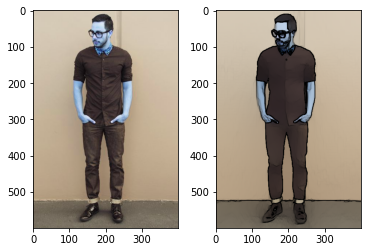

In [23]:
### 4-8服装区域
plt.subplot(121)
img=cv2.imread(f'./dataset/ICCV15_fashion_dataset(ATR)/humanparsing/JPEGImages/dataset10k_{id}.jpg')
mask=cv2.imread(f'dataset/ICCV15_fashion_dataset(ATR)/humanparsing/SegmentationClassAug/dataset10k_{id}.png',0)
res = cv2.stylization(img, sigma_s=60, sigma_r=0.6)
plt.imshow(img)
plt.subplot(122)
mask = cv2.imread(f'./dataset/ICCV15_fashion_dataset(ATR)/humanparsing/SegmentationClassAug/dataset10k_{id}.png',0)
pd.DataFrame(mask).to_csv('1.csv')
# 将风格转换为Numpy数组
plt.imshow(res)
# 显示掩码标签
plt.show()

In [86]:
# 阈值分割
_, thresholded = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)

# 查找轮廓
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 计算边界框
x, y, w, h = cv2.boundingRect(contours[0])

# 提取部分
extracted = img[y:y+h, x:x+w]

# 缩放提取部分
resized = cv2.resize(extracted, (img.shape[1], img.shape[0]))

# 生成新图像
new_image = np.zeros_like(img)
x_offset = np.random.randint(0, img.shape[1] - w + 1)
y_offset = np.random.randint(0, img.shape[0] - h + 1)
new_image[y_offset:y_offset+h, x_offset:x_offset+w] = resized

# 显示新图像
cv2.imshow('New Image', new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.6.0) /io/opencv/modules/imgproc/src/contours.cpp:195: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


### 最大子矩阵

In [79]:
def getMaxMatrix(matrix):
    """
    :type matrix: List[List[int]]
    :rtype: List[int]
    """
    m, n = len(matrix), len(matrix[0])
    sums = [[0 for i in range(n+1)]for j in range(m+1)]
    for i in range(1,m+1):  #[0,0][i,j]的子矩阵的和 前缀和
        for j in range(1,n+1):
            sums[i][j] = sums[i][j-1] + sums[i-1][j] - sums[i-1][j-1] + matrix[i-1][j-1]
    maxarea = -float('inf')
    for up in range(m+1):
        for bottom in range(up+1,m+1):
            minleft = 0  
            r1,c1 = up,0   
            for right in range(1, n+1):
                area = sums[bottom][right] - sums[up][right] - minleft
                if area > maxarea:
                    output = [r1,c1, bottom-1,right-1]
                    maxarea = area
                if sums[bottom][right] - sums[up][right] < minleft:  
                    r1,c1 = up,right
                    minleft = sums[bottom][right] - sums[up][right]
    return output
getMaxMatrix(mask)

[219, 134, 530, 224]

In [ ]:
def largest_rectangle_area(heights):
    stack = [-1]  # 初始化栈
    heights.append(0)  # 添加哨兵
    max_area = 0
    for i in range(len(heights)):
        while stack[-1] != -1 and heights[stack[-1]] > heights[i]:
            h = heights[stack.pop()]
            w = i - stack[-1] - 1
            max_area = max(max_area, h * w)
        stack.append(i)
    heights.pop()  # 移除哨兵
    return max_area

def largest_rectangle(matrix):
    if not matrix:
        return 0
    m, n = len(matrix), len(matrix[0])
    heights = [0] * n
    max_area = 0
    for i in range(m):
        for j in range(n):
            if matrix[i][j] == 1:
                heights[j] += 1
            else:
                heights[j] = 0
        max_area = max(max_area, largest_rectangle_area(heights))
    return max_area


### 扩冲模糊

In [71]:
from PIL import Image, ImageDraw,ImageFilter
import numpy as np

# 定义画布大小
width = 500
height = 500

# 创建空白画布
image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(image)

# 生成随机色块
for i in range(5000):
    x0 = np.random.randint(width)
    y0 = np.random.randint(height)
    x1 = np.clip(x0 + np.random.randint(20), 0, width - 1)
    y1 = np.clip(y0 + np.random.randint(20), 0, height - 1)
    color = (np.random.randint(255), np.random.randint(255), np.random.randint(255))
    draw.rectangle([(x0, y0), (x1, y1)], fill=color)

# 将图像模糊，以创建水彩效果
image = image.filter(ImageFilter.GaussianBlur(radius=10))

# 显示图像
image.show()


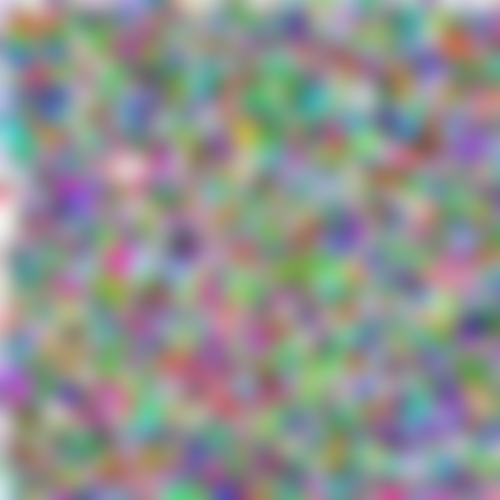

In [72]:
image